In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Data_for_UCI_named.csv')

In [4]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


Dataset Description
Stability of the Grid System
Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy source, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classification model to predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.

Dataset: https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

It has 12 primary predictive features and two dependent variables.

Predictive features:

- 'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
- 'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
- 'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');

Dependent variables:

- 'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
- 'stabf': a categorical (binary) label ('stable' or 'unstable').
Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).


Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test). 

Use scikit learn to train a 
- random forest and 
- extra trees classifier. 
And use 
- xgboost and 
- lightgbm to 
train an extreme boosting model and a light gradient boosting model. 

Use random_state = 1 for training all models and evaluate on the test set. 

Also, to improve the Extra Trees Classifier, you will use the following parameters (number of estimators, minimum number of samples, minimum number of samples for leaf node and the number of features to consider when looking for the best split) for the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV). 

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [5]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [7]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [8]:
#separating data into feature and target variables. X is feature, y is the target
X = df.drop(['stab', 'stabf'], axis=1)
y = df['stabf']

In [9]:
#splitting data into train and test sets with 80-20 split ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [10]:
len(x_train)

8000

In [11]:
len(y_train)

8000

In [12]:
len(x_test)

2000

In [13]:
len(y_test)

2000

# Data Normalization and Encoding

- Used Standard Scaler to normalize the feature sets, x_train and x_test

In [14]:
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [15]:
#normalizing the train feature set with standard scaler
scaler = StandardScaler()

scaler.fit(x_train)

data = scaler.transform(x_train)

scaled_xtrain = pd.DataFrame(data, columns=x_train.columns)
scaled_xtrain.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [16]:
len(scaled_xtrain)

8000

In [17]:
#normalizing the test feature set with standard scaler
scaler.fit(x_test)

data = scaler.transform(x_test)

scaled_xtest = pd.DataFrame(data, columns=x_test.columns)
scaled_xtest.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.592163,-0.420565,1.472472,1.093036,0.426786,-1.504594,-0.792677,1.600201,-0.925703,1.175287,-1.492644,1.086291
1,0.199183,0.364543,-0.190076,-0.518473,-0.229402,-1.071766,0.427103,1.052337,-1.655910,-0.395949,1.412703,1.227535
2,-1.086035,-0.321834,-0.873505,0.011761,-0.977094,0.094896,0.813041,0.751381,1.450284,-1.444370,0.654216,-1.679799
3,-0.087014,-1.113357,0.361518,-1.684316,0.792280,-1.649041,0.410662,-0.084473,0.066085,-1.679450,-0.349573,1.057439
4,0.873004,1.425833,0.080476,1.681022,-0.154247,-0.024315,-0.197525,0.485988,0.119716,-1.475773,0.957057,-0.817608


## Random Forest

In [27]:
rand_clf = RandomForestClassifier(random_state=1)


In [28]:
rand_clf.fit(scaled_xtrain, y_train)

rand_pred = rand_clf.predict(scaled_xtest)

In [29]:
round(accuracy_score(y_test, rand_pred), 4)

0.928

<Figure size 576x576 with 0 Axes>

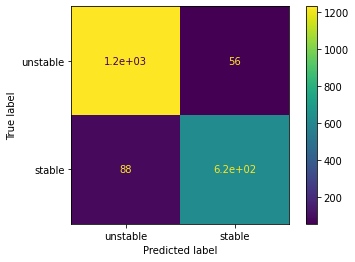

In [50]:
plot_confusion_matrix(rand_clf, scaled_xtest, y_test, labels=y_test.unique())

## Extra Trees Clasifier

In [21]:
extratrees_clf = ExtraTreesClassifier(random_state=1)

In [22]:
extratrees_clf.fit(scaled_xtrain, y_train)

extratree_pred = extratrees_clf.predict(scaled_xtest)

In [23]:
round(accuracy_score(y_test, extratree_pred), 4)

0.926

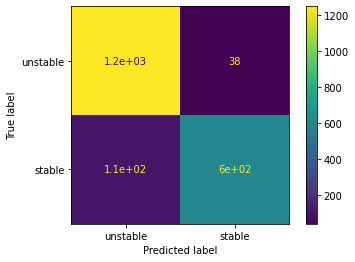

In [51]:
plot_confusion_matrix(extratrees_clf, scaled_xtest, y_test, labels=y_test.unique())

### Hyperparameter Tuning of the Extratrees classifier

In [42]:
from sklearn.model_selection import RandomizedSearchCV
params = dict(n_estimators = [50, 100, 300, 500, 1000],
              min_samples_split = [2, 3, 5, 7, 9],
              min_samples_leaf = [1, 2, 4, 6, 8],
              max_features = ['auto', 'sqrt', 'log2', None])


rs_extratrees = RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=1),
                            param_distributions=params,random_state=1)


result = rs_extratrees.fit(scaled_xtrain, y_train)

print('Best Score: ', result.best_score_)
print('Best Params: ', result.best_params_)

Best Score:  0.9241249999999999
Best Params:  {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}


In [43]:
xtra_pred = rs_extratrees.predict(scaled_xtest)

In [44]:
round(accuracy_score(y_test, xtra_pred), 4)

0.9285

The accuracy of the optimized extratrees is slightly higher than the intial model

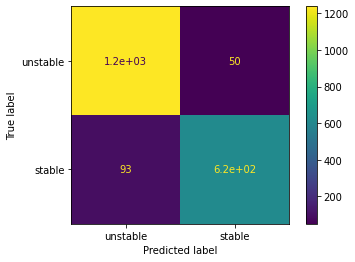

In [52]:
plot_confusion_matrix(rs_extratrees, scaled_xtest, y_test, labels=y_test.unique())

In [41]:
#checking for feature importance

feature_data = pd.DataFrame({'importance':improved_extratrees.feature_importances_, 'features':scaled_xtrain.columns})

feature_data.sort_values('importance')

,importance,features
4,0.003683,p1
7,0.004962,p4
5,0.005337,p2
6,0.005429,p3
8,0.102562,g1
9,0.107578,g2
11,0.109541,g4
10,0.113063,g3
2,0.134680,tau3
3,0.135417,tau4


tau2 is the most important feature, while p1 is the least important feature

## XGBOOST

In [32]:
clf_xgb = XGBClassifier(random_state=1)

clf_xgb.fit(scaled_xtrain, y_train)

xbg_pred = clf_xgb.predict(scaled_xtest)

In [33]:
round(accuracy_score(y_test, xbg_pred), 4)

0.919

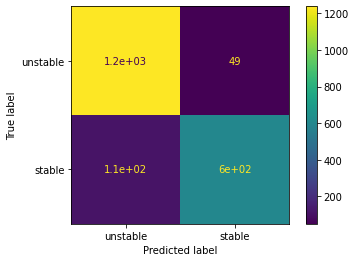

In [53]:
plot_confusion_matrix(clf_xgb, scaled_xtest, y_test, labels=y_test.unique())

## LightGBM

In [34]:
lgbm_clf = LGBMClassifier(random_state=1)

lgbm_clf.fit(scaled_xtrain, y_train)

lgbm_pred = lgbm_clf.predict(scaled_xtest)

In [35]:
round(accuracy_score(y_test, lgbm_pred), 4)

0.9355

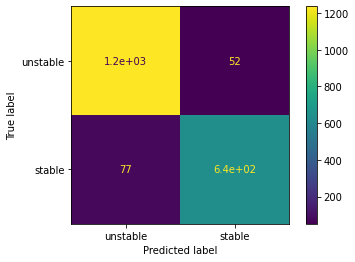

In [54]:
plot_confusion_matrix(lgbm_clf, scaled_xtest, y_test, labels=y_test.unique())

In [45]:
#question 1
#F1 score

tp = 355
fn = 45
tn = 120
fp = 1480

In [46]:
precision = tp / (tp + fp) #True Positives divided by the number of True Positives and False Positives.
recall = tp / (tp + fn)  #True Positives divided by the number of True Positives and the number of False Negatives. 

f1_score = 2*((precision*recall)/(precision+recall))

print('The f1_score is {}'.format(f1_score))

The f1_score is 0.3176733780760626
